In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [21]:
def gaussian_filtering(img, P, sigma):
    w = np.zeros((2*P+1, 2*P+1))
    for k in range(-P, P+1):
        for l in range(-P, P+1):
            C =1/(2*np.pi*sigma**2)
            w[k+P, l+P] = C*np.exp(-(k**2 + l**2)/(2*sigma**2))
    w /= np.sum(w)

    # Apply filter
    denoised_img = cv.filter2D(img, -1, w)
    return denoised_img

In [22]:
ref_img = cv.imread('E:\A10-11\A10\img167.bmp')

In [23]:
sigmas =[0.1,1,2,4,8]
folder_path = 'E:\A10-11\A10\imagesforlab1'
image_names = os.listdir(folder_path)
print(image_names)


new_index = [3,1,4,5,2]

# Create a new list with the elements in the desired order
image_names = [image_names[i-1] for i in new_index]
print(image_names)



mse_values= []
ssim_values =[]

denoised_list = []
for sigma in sigmas:
    # denoised_list = []
    for image_name in image_names:
        image_path = os.path.join(folder_path, image_name)
        img = cv.imread(image_path)
        Denoised_img = gaussian_filtering(img,5,sigma)
        denoised_list.append(Denoised_img)

        # # plot the original and filtered images side by side
        # fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
        # ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
        # ax[0].set_title('Original Image:{}'.format(image_name))
        # ax[1].imshow(cv.cvtColor(Denoised_img,cv.COLOR_BGR2RGB))
        # ax[1].set_title('Denoised image (sigma={:.1f})'.format(sigma))
        # plt.show()
    



['img108.bmp', 'img125.bmp', 'img137.bmp', 'img32.bmp', 'img6.bmp']
['img137.bmp', 'img108.bmp', 'img32.bmp', 'img6.bmp', 'img125.bmp']


In [24]:

from skimage.metrics import mean_squared_error, structural_similarity as ssim

def calculate_metrics(ref_img, denoised_img):
    # split the images into color channels

    # calculate the MSE and SSIM for each color channel
    channel_mse = []
    channel_ssim = []
    for i in range(3):
        mse = mean_squared_error(ref_img[:,:,i],denoised_img[:,:,i])
        channel_mse.append(mse)
        ssim_val = ssim(ref_img[:,:,i],denoised_img[:,:,i],multichannel=True)
        channel_ssim.append(ssim_val)

    # calculate the overall MSE and SSIM for the image
    mse = np.mean(channel_mse)
    ssim_val = np.mean(channel_ssim)

    return mse, ssim_val


In [25]:
mse_values =[]
ssim_values =[]

for denoised_img in denoised_list:
    mse, ssim_val = calculate_metrics(ref_img, denoised_img)
    mse_values.append(mse)
    ssim_values.append(ssim_val)


C:\Users\Aman\AppData\Local\Temp\ipykernel_14488\219773060.py:12: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(ref_img[:,:,i],denoised_img[:,:,i],multichannel=True)


In [26]:
sigma_values = [0.1, 1, 2, 4, 5]
num_images = 5

# initialize lists to store MSE values for each image
mse_per_image = [[] for i in range(num_images)]
ssim_per_image = [[] for i in range(num_images)]

# iterate over each sigma value
for i, sigma in enumerate(sigma_values):
    start_index = i*num_images
    end_index = start_index + num_images
    mse_per_sigma = mse_values[start_index:end_index]
    for j, mse in enumerate(mse_per_sigma):
        mse_per_image[j].append(mse)

# print the MSE values for each image for each sigma
for i, mse_list in enumerate(mse_per_image):
    print(f"MSE values for image {i+1} for all sigma values: {mse_list}")



MSE values for image 1 for all sigma values: [15423.493832058377, 2572.1547173394097, 1788.0533065795898, 1666.128221299913, 1662.078922695584]
MSE values for image 2 for all sigma values: [919.0718409220377, 184.875725640191, 252.3727773030599, 333.05435265435113, 364.7931535508898]
MSE values for image 3 for all sigma values: [1638.5141228569876, 248.236444261339, 273.2483630710178, 345.5247455173069, 376.1532609727647]
MSE values for image 4 for all sigma values: [79.69731140136719, 113.12979719373914, 230.0860816107856, 320.08948092990454, 352.85646565755206]
MSE values for image 5 for all sigma values: [24.76818084716797, 108.5508295694987, 228.72000715467667, 319.2595486111111, 352.0689968532986]


In [27]:
ssim_per_image = [[] for i in range(num_images)]

# iterate over each sigma value
for i, sigma in enumerate(sigma_values):
    start_index = i*num_images
    end_index = start_index + num_images
    ssim_per_sigma = ssim_values[start_index:end_index]
    for j, ssim in enumerate(ssim_per_sigma):
        ssim_per_image[j].append(ssim)

# print the MSE values for each image for each sigma
for i, ssim_list in enumerate(ssim_per_image):
    print(f"SSIM values for image {i+1} for all sigma values: {ssim_list}")
   

SSIM values for image 1 for all sigma values: [0.012944611232903441, 0.11799274866296648, 0.3200923385239928, 0.4318226321624219, 0.4255806677224047]
SSIM values for image 2 for all sigma values: [0.275013811617904, 0.6252321686078348, 0.6601531503014104, 0.6163010057392865, 0.594567245345428]
SSIM values for image 3 for all sigma values: [0.2000407243588488, 0.5382177461112607, 0.6289016497565417, 0.605201871893209, 0.5843936607094674]
SSIM values for image 4 for all sigma values: [0.6853273937698187, 0.8144848234322364, 0.702926262553485, 0.6292007601034637, 0.6065972896089927]
SSIM values for image 5 for all sigma values: [0.8518774390742414, 0.836219432993579, 0.7060137695489307, 0.6300705882938181, 0.6074243594888232]


In [28]:
# initialize a list to store the best sigma value for each image
best_sigma_mse = []

# iterate over each MSE list for each image
for i, mse_list in enumerate(mse_per_image):
    # find the index of the minimum MSE value
    min_mse_index = mse_list.index(min(mse_list))
    # use the index to retrieve the corresponding sigma value
    best_sigma = sigma_values[min_mse_index]
    # append the best sigma value to the list
    best_sigma_mse.append(best_sigma)

# print the best sigma value for each image
for i, best_sigma in enumerate(best_sigma_mse):
    print(f"Best sigma value for image {i+1}: {best_sigma}")


Best sigma value for image 1: 5
Best sigma value for image 2: 1
Best sigma value for image 3: 1
Best sigma value for image 4: 0.1
Best sigma value for image 5: 0.1


In [29]:
# initialize a list to store the best sigma value for each image
best_sigma_SSIM = []

# iterate over each MSE list for each image
for i, ssim_list in enumerate(ssim_per_image):
    # find the index of the minimum MSE value
    max_ssim_index = ssim_list.index(max(ssim_list))
    # use the index to retrieve the corresponding sigma value
    best_sigma = sigma_values[max_ssim_index]
    # append the best sigma value to the list
    best_sigma_SSIM.append(best_sigma)

# print the best sigma value for each image
for i, best_sigma in enumerate(best_sigma_SSIM):
    print(f"Best sigma value for image {i+1}: {best_sigma}")
    

Best sigma value for image 1: 4
Best sigma value for image 2: 2
Best sigma value for image 3: 2
Best sigma value for image 4: 1
Best sigma value for image 5: 0.1


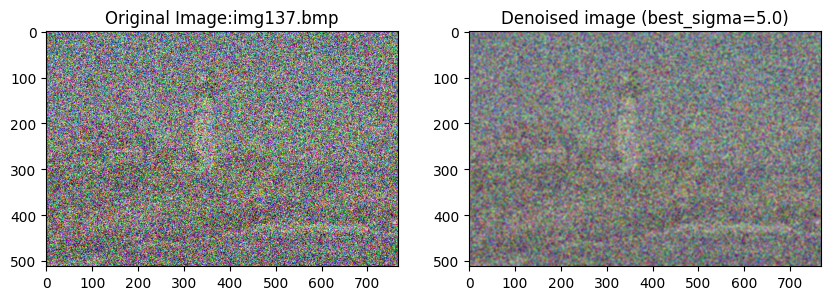

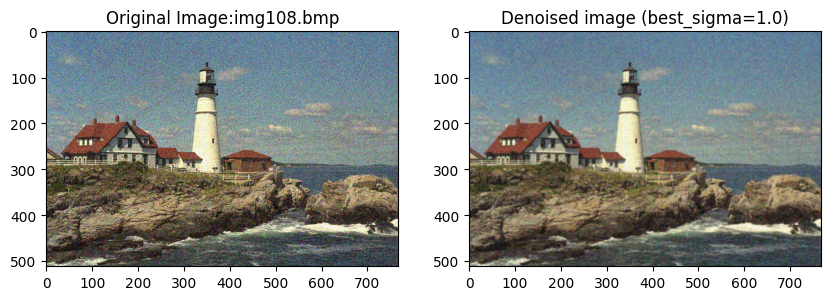

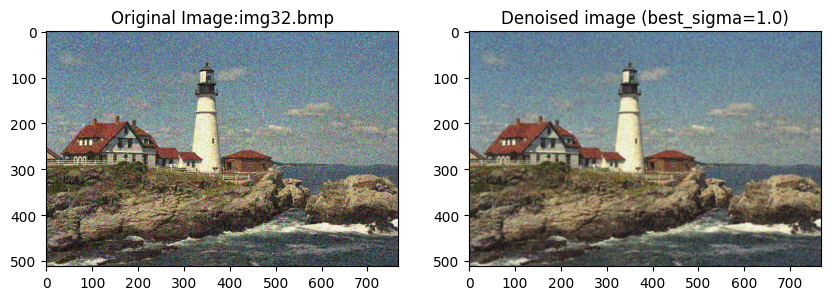

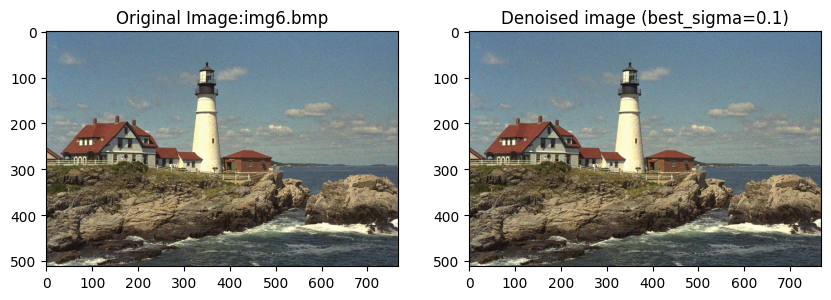

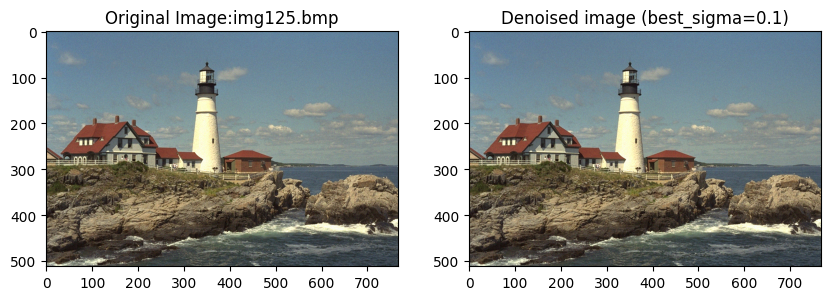

In [30]:



for i, image_name in enumerate(image_names):
    image_path = os.path.join(folder_path, image_name)
    img = cv.imread(image_path)
    
    # apply Gaussian blur with the best sigma value found
    best_sigma = best_sigma_mse[i]
    blurred = cv.GaussianBlur(img, (5, 5), sigmaX=best_sigma)
    
    # save the result as a new image file
    new_image_name = f"{image_name[:-4]}_denoised_sigma{best_sigma}.bmp"
    # cv.imwrite(new_image_name, blurred)
    
   

    # plot the original and filtered images side by side
    fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
    ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    ax[0].set_title('Original Image:{}'.format(image_name))
    ax[1].imshow(cv.cvtColor(blurred,cv.COLOR_BGR2RGB))
    ax[1].set_title('Denoised image (best_sigma={:.1f})'.format(best_sigma))
    plt.show()


# set the figure title
fig.suptitle("Original vs. denoised images")

# show the plot
plt.show()


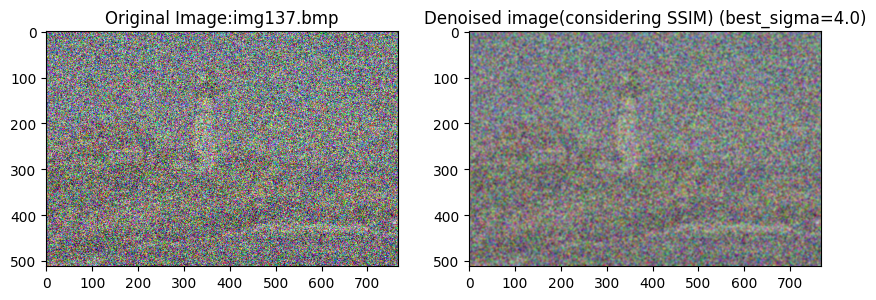

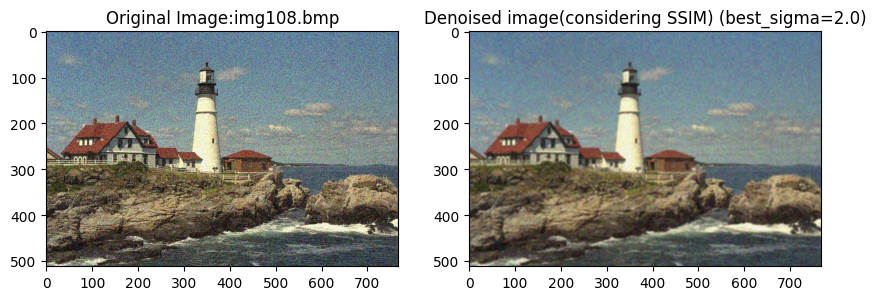

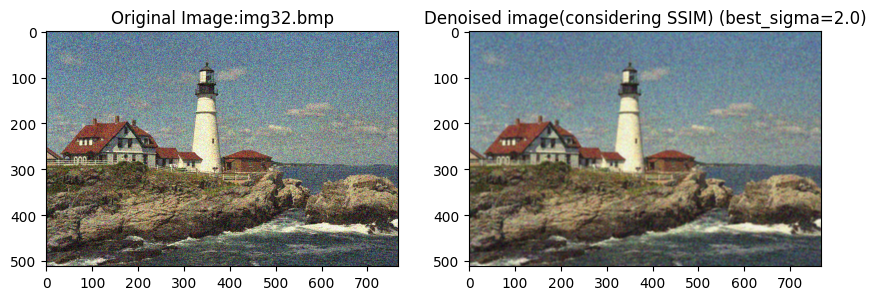

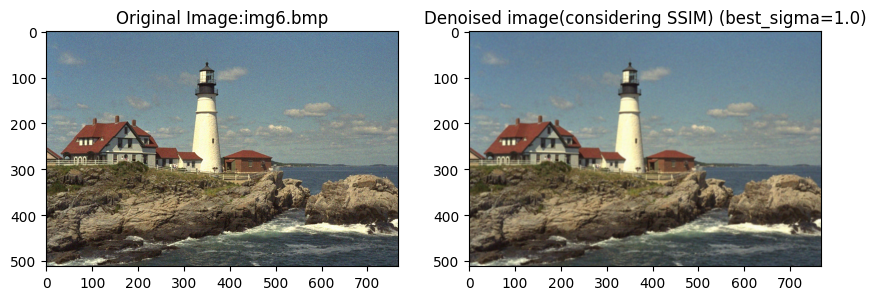

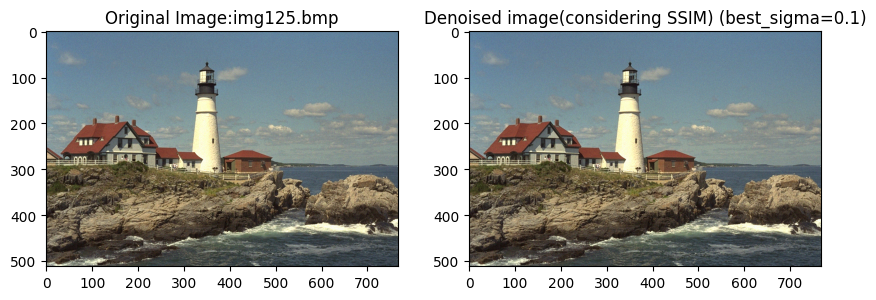

In [31]:
for i, image_name in enumerate(image_names):
    image_path = os.path.join(folder_path, image_name)
    img = cv.imread(image_path)
    
    # apply Gaussian blur with the best sigma value found
    best_sigma = best_sigma_SSIM[i]
    blurred = cv.GaussianBlur(img, (5, 5), sigmaX=best_sigma)
    
    # save the result as a new image file
    new_image_name = f"{image_name[:-4]}_denoised_sigma{best_sigma}.bmp"
    # cv.imwrite(new_image_name, blurred)
    
   

    # plot the original and filtered images side by side
    fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
    ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    ax[0].set_title('Original Image:{}'.format(image_name))
    ax[1].imshow(cv.cvtColor(blurred,cv.COLOR_BGR2RGB))
    ax[1].set_title('Denoised image (best_sigma={:.1f}) (considering SSIM)'.format(best_sigma))
    plt.show()


# set the figure title
fig.suptitle("Original vs. denoised images")
fig.savefig(f'{image_name[:-4]}_denoised_sigma{best_sigma}.png', dpi=300)
# show the plot
plt.show()


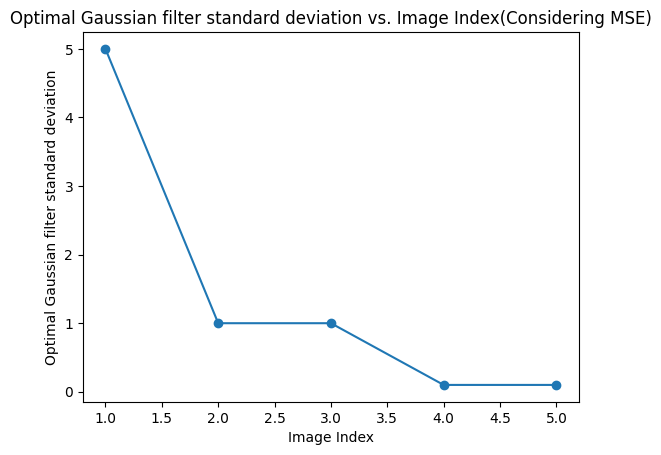

In [14]:
import matplotlib.pyplot as plt

# create lists for image index and best sigma value
image_index = list(range(1, len(best_sigma_mse) + 1))
best_sigma_values = best_sigma_mse

# plot the curve
plt.plot(image_index, best_sigma_values, marker='o')
plt.xlabel('Image Index')
plt.ylabel('Optimal Gaussian filter standard deviation')
plt.title('Optimal Gaussian filter standard deviation vs. Image Index(Considering MSE)')
plt.show()


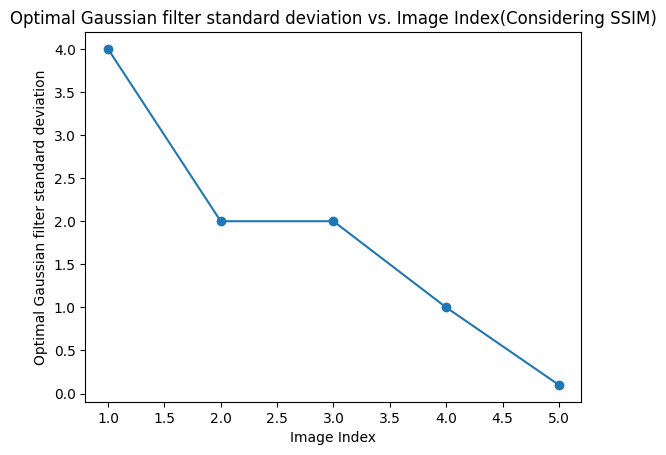

In [15]:
# create lists for image index and best sigma value
image_index = list(range(1, len(best_sigma_SSIM) + 1))
best_sigma_values = best_sigma_SSIM

# plot the curve
plt.plot(image_index, best_sigma_values, marker='o')
plt.xlabel('Image Index')
plt.ylabel('Optimal Gaussian filter standard deviation')
plt.title('Optimal Gaussian filter standard deviation vs. Image Index(Considering SSIM)')
plt.show()